In [115]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

In [109]:
def obs_to_num(obs):
    dest = obs % 4
    obs = (obs - dest)//4
    pass_loc = obs % 5
    obs = (obs - pass_loc)//5
    taxi_col = (obs % 5)
    obs = (obs - taxi_col)//5
    taxi_row = obs
    return (taxi_row,taxi_col, pass_loc,dest)

In [137]:
import time

# function to update q_values for monte carlo

def update_q(q_values, obs_list,action_list, reward_list, freq_actions):
    
    new_q = q_values.copy()
    
    # we pop the last element because there is no action we can take after that, hence no reward we can associate with it.
    
    if len(obs_list) > len(reward_list): obs_list.pop()
    
    factor = 1
    gamma = 0.9
    gamma_array = []
    
    for _ in range(len(obs_list)):
        gamma_array.append(factor)
        factor *= gamma
        
    gamma_array = np.array(gamma_array)
    

    for i in range(len(obs_list)):
        # current state obs_list[i], have to update according to monte carlo
        # then the aciton is taken
        # then the reward is awarded
        
        rewards = np.array(reward_list[i:])
        g_t = np.sum(rewards*gamma_array)
        
        freq_actions[obs_list[i], action_list[i]] += 1 
        n_s = freq_actions[obs_list[i], action_list[i]]
        
        
        q_s_a = q_values[obs_list[i], action_list[i]]
        q_values[obs_list[i], action_list[i]] = q_s_a + (1/n_s)*(g_t - q_s_a)


        
        
        gamma_array = gamma_array[:-1]
        
    return q_values, freq_actions


start = time.time()
# q_values,freq_actions = update_q(q_values, obs_list,action_list, reward_list, freq_actions)
print(time.time() - start)
# with numpy.printoptions(threshold=numpy.inf):
#     print(q_values)

0.0


In [180]:
# initialising q

q_values = np.zeros((500, 6))
freq_actions = np.zeros((500, 6)).astype(int)



In [181]:
# Monte Carlo

num_ep = 10000
epsilon = 0
start = time.time()
c_reward = []
for episode in range(num_ep):
    
    if episode <= 300:
        epsilon = 1
    else:
        epsilon = 1/(episode - 300)
    
    obs_list = []
    reward_list = []
    action_list =[]
    obs, info = env.reset()
    obs_list.append(obs)
    done, trunc = False, False
    if render: env.render()
    
    while not(done):
        if random.random() < epsilon:    
            action = env.action_space.sample(info['action_mask'])
            
        else:  
            temp = np.where(info["action_mask"] == 1)[0]
            index = np.argmax(q_values[obs, np.where(info["action_mask"] == 1)[0]])
            action = temp[index]
#             print(action, info['action_mask'], q_values[obs])
            
        obs, reward, done, trunc, info = env.step(action)
        if render: env.render()
        curr_state = obs_to_num(obs)
        action_list.append(action)
        obs_list.append(obs)
        reward_list.append(reward)

#         print(obs_to_num(obs), action, reward)
    c_reward.append(sum(reward_list))
    old_q = q_values.copy()
    q_values,freq_actions = update_q(q_values, obs_list,action_list, reward_list, freq_actions)
#     print(np.max(q_values - old_q))
    env.close()


print(time.time() - start)

48.23024106025696


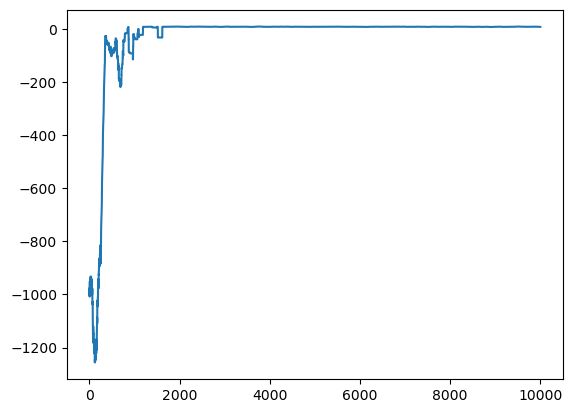

In [195]:
# plot for Monte Carlo

c_reward = np.array(c_reward)

mean_rewards = np.zeros(10000)
for i in range(10000):
    mean_rewards[i] = np.mean(c_reward[max(0,i-50):i+50])
        
plt.plot(mean_rewards)
plt.show()

In [156]:
import json
path = "q_monte_carlo.json"
with open(path, 'a') as json_file:
    json.dump(freq_actions.tolist(), json_file)

In [188]:
# to switch between rendering and just crunching numbers

render = 1

if render:
    env = gym.make('Taxi-v3', render_mode = "human")
else:
    env = gym.make('Taxi-v3')


In [176]:
# cell used for rendering Monte Carlo
                
# print(q_values)

epsilon = 0
start = time.time()
for episode in range(10):
    
    epsilon = 0
    
    obs_list = []
    reward_list = []
    action_list =[]
    obs, info = env.reset()
    obs_list.append(obs)
    done, trunc = False, False
    if render: env.render()
    
    while not(done):
        if random.random() < epsilon:    
            action = env.action_space.sample(info['action_mask'])
            
        else:  
            temp = np.where(info["action_mask"] == 1)[0]
            index = np.argmax(q_values[obs, np.where(info["action_mask"] == 1)[0]])
            action = temp[index]
#             print(action, info['action_mask'], q_values[obs])
            
        obs, reward, done, trunc, info = env.step(action)
        if render: env.render()
        curr_state = obs_to_num(obs)
        action_list.append(action)
        obs_list.append(obs)
        reward_list.append(reward)

#         print(obs_to_num(obs), action, reward)
#     q_values,freq_actions = update_q(q_values, obs_list,action_list, reward_list, freq_actions)
    print(sum(reward_list))



print(time.time() - start)

7
14
9
5
3
6
14


KeyboardInterrupt: 

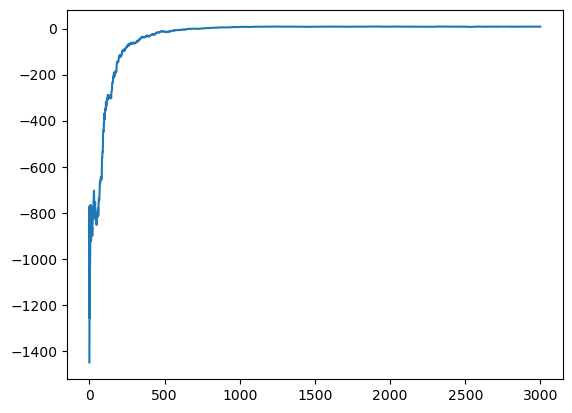

In [187]:
# q - learning

Q = np.zeros((500, 6))

alp = 0.1
gamma = 0.99
epsilon = 1

num_ep = 3000

total_rewards = np.zeros(num_ep)

for i in range(num_ep):
    state, info = env.reset()
    score = 0
    done, trunc = False, False
    
    while not done:
        if np.random.random() < epsilon:
            action = env.action_space.sample(info['action_mask'])
        else:
            temp = np.where(info["action_mask"] == 1)[0]
            index = np.argmax(Q[state, temp])
            action = temp[index]
        state_, reward, done, trunc, info = env.step(action)
        score += reward
        
        temp_ = np.where(info["action_mask"] == 1)[0]
        index_ = np.argmax(Q[state_, temp_])
        action_ = temp_[index_]
        
        Q[state][action] = Q[state][action] + alp*(reward + gamma*Q[state_][action_] - Q[state][action])
        state = state_
    epsilon = epsilon - 0.001
    total_rewards[i] = score
#     if i % 10 == 0: print(score)

# print(Q)
mean_rewards = np.zeros(num_ep)
for i in range(num_ep):
    mean_rewards[i] = np.mean(total_rewards[max(0,i-50):i+1])
        
plt.plot(mean_rewards)
plt.show()

In [189]:
# For rendering Q-Learning


for episode in range(10):
    
    epsilon = 0
    
    reward_list = []

    obs, info = env.reset()
    done, trunc = False, False
    if render: env.render()
    
    while not(done):
        if random.random() < epsilon:    
            action = env.action_space.sample(info['action_mask'])
            
        else:  
            temp = np.where(info["action_mask"] == 1)[0]
            index = np.argmax(Q[obs, np.where(info["action_mask"] == 1)[0]])
            action = temp[index]
#             print(action, info['action_mask'], q_values[obs])
            
        obs, reward, done, trunc, info = env.step(action)
        if render: env.render()

        reward_list.append(reward)

#         print(obs_to_num(obs), action, reward)
#     q_values,freq_actions = update_q(q_values, obs_list,action_list, reward_list, freq_actions)
    print(sum(reward_list))



print(time.time() - start)

7
7
8
10
7
8


KeyboardInterrupt: 

In [ ]:
# beyond this is unused code

In [ ]:
action = np.argmax(q_values[obs, np.where(info["action_mask"] == 1)[0]])

In [ ]:
import numpy as np
a = np.array([1,2,3,4])
b = np.array([1,0.9,0.81,0.729])
a*b

In [ ]:
jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10 

In [11]:
env.close()

In [ ]:
# first episode we select random actions
                
# print(q_values)

epsilon = 0
start = time.time()
for episode in range(3):
    
    epsilon = 1/(episode + 1)
    
    obs_list = []
    reward_list = []
    action_list =[]
    obs, info = env.reset()
    obs_list.append(obs)
    done, trunc = False, False
    if render: env.render()
    
    while not(done):
        if random.random() < epsilon:    
            action = env.action_space.sample()
#             print("random")
        else:  
            action = np.argmax(q_values[obs])
#             print("greedy")
#             print(action, info['action_mask'], q_values[obs])
            
        obs, reward, done, trunc, info = env.step(action)
        if render: env.render()
        curr_state = obs_to_num(obs)
#         if reward == -10: print("yes")
        action_list.append(action)
        obs_list.append(obs)
        reward_list.append(reward)

#         print(obs_to_num(obs), action, reward)
    q_values,freq_actions = update_q(q_values, obs_list,action_list, reward_list, freq_actions)
    env.close()


print(time.time() - start)

In [43]:
monte_carlo = q_values.copy()

In [44]:
f_monte_carlo = freq_actions.copy()

In [190]:
import json
path = "Q_learning.json"
with open(path, 'a') as json_file:
    json.dump(Q.tolist(), json_file)